In [1]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-white')

## DATA COLLECTION

In [3]:
#loading the data
sp500 = pd.read_csv('sp500_data.csv')
sp500.head()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,2023-09-01,4515.770000,0.00,0.00,306.13,4.09,4515.77,0.00,0.00,33.25
1,2023-08-01,4457.358696,0.00,0.00,305.98,4.17,4459.48,0.00,0.00,32.91
2,2023-07-01,4508.075500,0.00,0.00,305.69,3.90,4514.51,0.00,0.00,33.38
3,2023-06-01,4345.372857,68.71,181.17,305.11,3.75,4359.88,68.94,181.77,32.41
4,2023-05-01,4146.173182,68.54,179.17,304.13,3.57,4173.45,68.99,180.35,31.14


## EDA

### Data Understanding & Cleaning

In [6]:
# checking amount of rows and columns
sp500.shape

(1833, 10)

In [7]:
#checking for duplicates
sp500.duplicated().sum()
print(f' Duplicates: {sp500.duplicated().sum()}')

 Duplicates: 0


In [8]:
# checking for duplicates
sp500.isna().sum()

Date                    0
SP500                   0
Dividend                0
Earnings                0
Consumer Price Index    0
Long Interest Rate      0
Real Price              0
Real Dividend           0
Real Earnings           0
PE10                    0
dtype: int64

In [9]:
sp500.head(10)

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,2023-09-01,4515.770000,0.00,0.000000,306.13,4.09,4515.77,0.00,0.00,33.25
1,2023-08-01,4457.358696,0.00,0.000000,305.98,4.17,4459.48,0.00,0.00,32.91
2,2023-07-01,4508.075500,0.00,0.000000,305.69,3.90,4514.51,0.00,0.00,33.38
3,2023-06-01,4345.372857,68.71,181.170000,305.11,3.75,4359.88,68.94,181.77,32.41
4,2023-05-01,4146.173182,68.54,179.170000,304.13,3.57,4173.45,68.99,180.35,31.14
5,2023-04-01,4121.467368,68.38,177.170000,303.36,3.46,4159.03,69.00,178.78,31.15
6,2023-03-01,3968.559130,68.21,175.170000,301.67,3.66,4027.13,69.22,177.76,30.27
7,2023-02-01,4079.684737,67.78,174.363333,300.84,3.75,4151.39,68.97,177.43,31.32
8,2023-01-01,3960.656500,67.35,173.556667,299.17,3.53,4052.77,68.92,177.59,30.69
9,2022-12-01,3912.380952,66.92,172.750000,296.80,3.62,4035.38,69.02,178.18,30.68


In [10]:
sp500.tail(10)

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
1823,1871-09-01,4.84,0.26,0.4,12.18,5.35,121.66,6.54,10.05,0.0
1824,1871-08-01,4.79,0.26,0.4,11.89,5.34,123.29,6.69,10.30,0.0
1825,1871-07-01,4.73,0.26,0.4,12.08,5.34,119.83,6.59,10.13,0.0
1826,1871-06-01,4.82,0.26,0.4,12.08,5.34,122.11,6.59,10.13,0.0
1827,1871-05-01,4.86,0.26,0.4,12.27,5.33,121.22,6.48,9.98,0.0
1828,1871-04-01,4.74,0.26,0.4,12.56,5.33,115.54,6.34,9.75,0.0
1829,1871-03-01,4.61,0.26,0.4,13.03,5.33,108.27,6.11,9.39,0.0
1830,1871-02-01,4.50,0.26,0.4,12.84,5.32,107.25,6.20,9.53,0.0
1831,1871-01-01,4.44,0.26,0.4,12.46,5.32,109.05,6.39,9.82,0.0
1832,1871-01-01,4.59,0.26,0.4,12.37,5.35,113.60,6.43,9.90,0.0


In [11]:
# replace all the values imputed as 0 with NaN
sp500 = sp500.replace(0,np.nan)

In [12]:
# checking for missing values again
sp500.isna().sum()/len(sp500) * 100

Date                    0.000000
SP500                   0.000000
Dividend                0.163666
Earnings                0.163666
Consumer Price Index    0.000000
Long Interest Rate      0.000000
Real Price              0.000000
Real Dividend           0.163666
Real Earnings           0.163666
PE10                    6.546645
dtype: float64

In [13]:
# handling missing values in the earnings and dividend column
sp500 = sp500.dropna(subset='Dividend')
sp500.isna().sum()

Date                      0
SP500                     0
Dividend                  0
Earnings                  0
Consumer Price Index      0
Long Interest Rate        0
Real Price                0
Real Dividend             0
Real Earnings             0
PE10                    120
dtype: int64

In [14]:
# Handling missing values in PE10 by linear interpolation
sp500['PE10'] = sp500['PE10'].interpolate(method='linear')

In [15]:
# Feature names and feature count
pd.DataFrame({'feature names':sp500.columns, 'feature count':sp500.nunique().values})

,feature names,feature count
0,Date,1678
1,SP500,1459
2,Dividend,778
3,Earnings,1388
4,Consumer Price Index,885
5,Long Interest Rate,648
6,Real Price,1779
7,Real Dividend,1253
8,Real Earnings,1547
9,PE10,1246


In [16]:
# summary statistics
sp500.describe().T

,count,mean,std,min,25%,50%,75%,max
SP500,1830.0,370.222048,791.550308,2.73,7.930000,18.0350,183.300000,4674.772727
Dividend,1830.0,7.481765,13.646132,0.18,0.420000,0.9300,7.705000,68.710000
Earnings,1830.0,17.583441,34.580971,0.16,0.572525,1.5415,14.898325,197.910000
Consumer Price Index,1830.0,64.933951,79.607567,6.28,10.280000,21.9000,107.200000,305.110000
Long Interest Rate,1830.0,4.488087,2.299434,0.62,3.152500,3.8000,5.100000,15.320000
Real Price,1830.0,737.636738,903.550526,82.87,210.240000,322.7650,811.672500,5140.590000
Real Dividend,1830.0,20.245612,13.513641,6.11,10.610000,16.2500,25.742500,71.220000
Real Earnings,1830.0,41.173087,37.653760,5.13,15.865000,27.0450,49.652500,217.260000
PE10,1830.0,20.811093,7.127558,6.58,15.752500,20.9300,24.347500,48.110000


### Formatting data types

In [18]:
#converting the date column to datetime
sp500['Date'] = pd.to_datetime(sp500['Date'])

In [19]:
# numerical columns
numerical_cols = sp500.drop('Date',axis=1).columns
numerical_cols

Index(['SP500', 'Dividend', 'Earnings', 'Consumer Price Index',
       'Long Interest Rate', 'Real Price', 'Real Dividend', 'Real Earnings',
       'PE10'],
      dtype='object')

In [20]:
# confirming datatypes
sp500.dtypes

Date                    datetime64[ns]
SP500                          float64
Dividend                       float64
Earnings                       float64
Consumer Price Index           float64
Long Interest Rate             float64
Real Price                     float64
Real Dividend                  float64
Real Earnings                  float64
PE10                           float64
dtype: object

### VISUALIZATION

#### Univariate Analysis

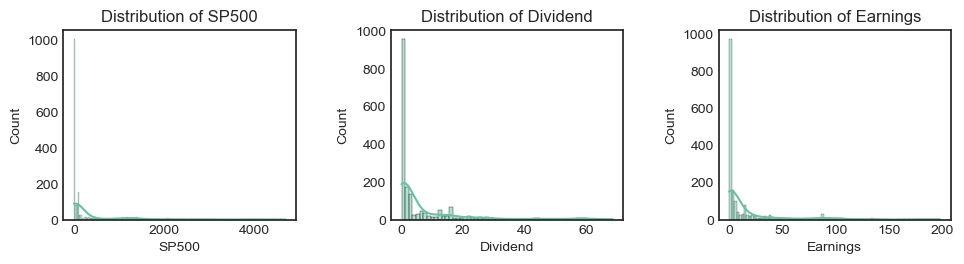

In [23]:
# plotting distribution of sp500, Dividend and Earnings
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, col in enumerate(numerical_cols[:3]):
    sns.histplot(sp500[col], kde=True, ax=axes[i],edgecolor='black',color='#66C2A5')
    axes[i].set_title(f'Distribution of {col}')
    #axes[i].set_xscale('log')
    #axes[i].set_xlabel(f'log of {col}')
plt.tight_layout(w_pad=3, pad=2)
plt.show()

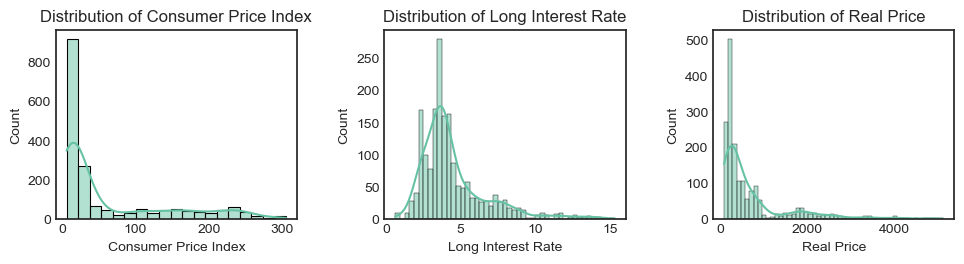

In [24]:
# plotting distribution of CPI, LIR, and Realprice
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, col in enumerate(numerical_cols[3:6]):
    sns.histplot(sp500[col], kde=True, ax=axes[i],edgecolor='black',color='#66C2A5')
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout(w_pad=3, pad=2)
plt.show()

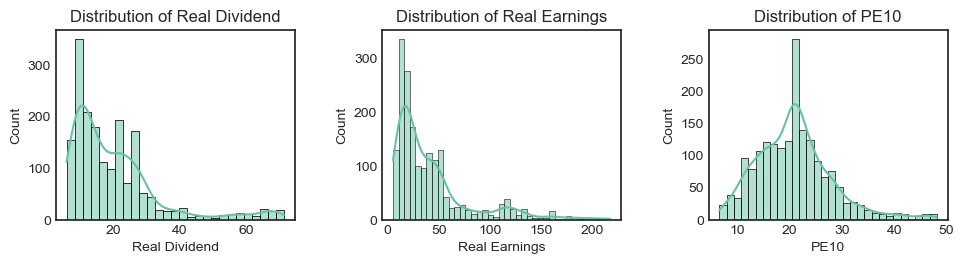

In [25]:
# plotting distribution of Real dividend, Real earnings and PE10
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, col in enumerate(numerical_cols[6:]):
    sns.histplot(sp500[col], kde=True, ax=axes[i],edgecolor='black',color='#66C2A5')
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout(w_pad=3, pad=2)
plt.show()

#### Bivariate Analysis

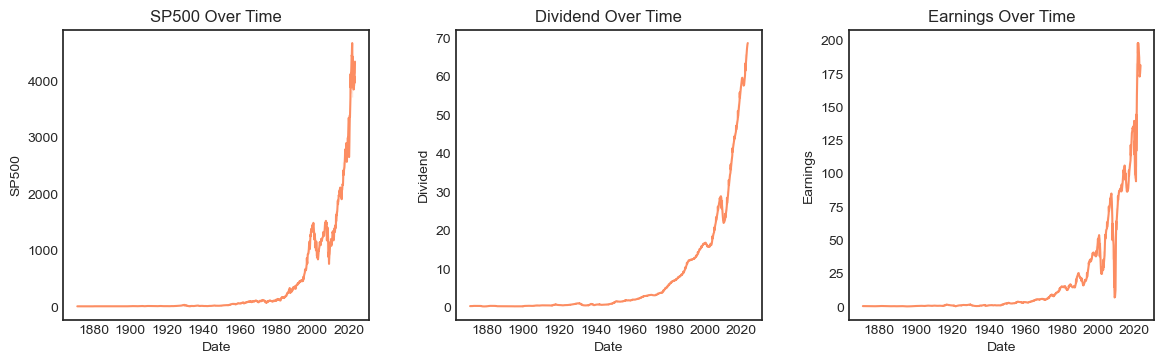

In [27]:
# Time series plot
fig, axes = plt.subplots(1, 3, figsize=(12,4))
for i, col in enumerate(numerical_cols[:3]):
    sns.lineplot(x=sp500['Date'], y=sp500[col], ax=axes[i], color='#FC8D62')
    axes[i].set_title(f'{col} Over Time')
plt.tight_layout(w_pad=3, pad=2)
plt.show()

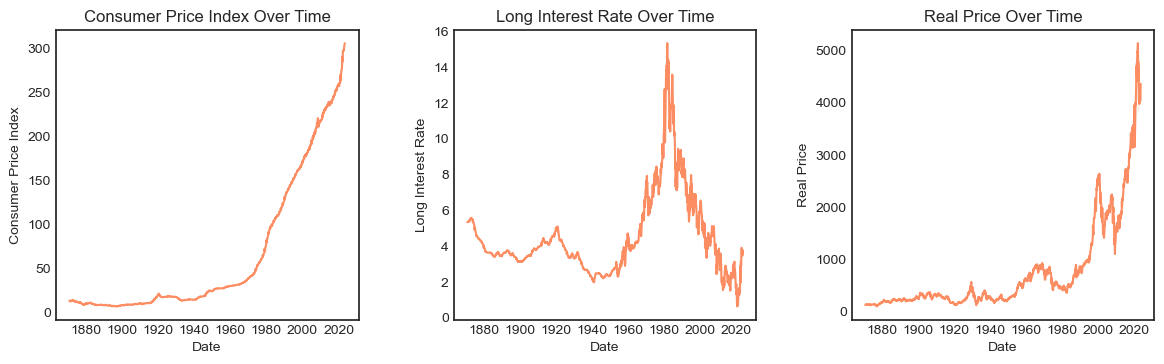

In [28]:
# Time series plot
fig, axes = plt.subplots(1, 3, figsize=(12,4))
for i, col in enumerate(numerical_cols[3:6]):
    sns.lineplot(x=sp500['Date'], y=sp500[col], ax=axes[i], color='#FC8D62')
    axes[i].set_title(f'{col} Over Time')
plt.tight_layout(w_pad=3, pad=2)
plt.show()

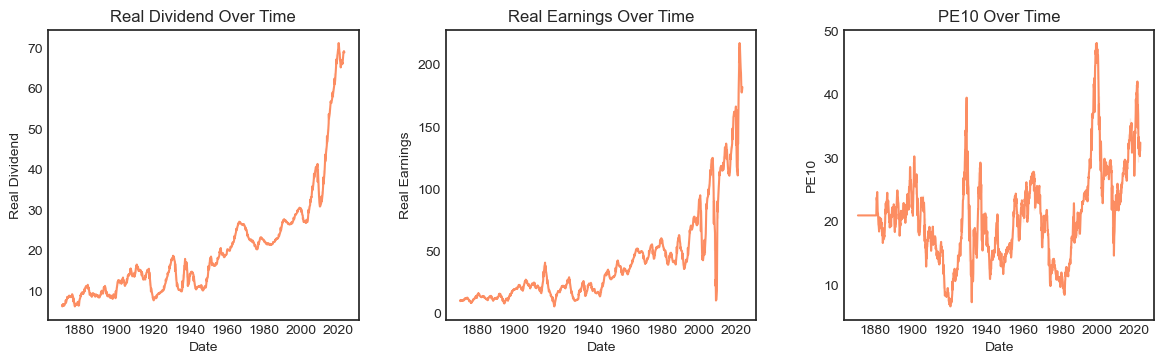

In [29]:
# Time series plot
fig, axes = plt.subplots(1, 3, figsize=(12,4))
for i, col in enumerate(numerical_cols[6:]):
    sns.lineplot(x=sp500['Date'], y=sp500[col], ax=axes[i], color='#FC8D62')
    axes[i].set_title(f'{col} Over Time')
plt.tight_layout(w_pad=3, pad=2)
plt.show()

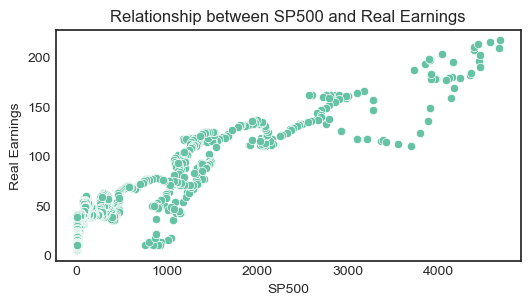

In [30]:
# Relationship between SP500 and Real Earnings
plt.figure(figsize=(6, 3))
sns.scatterplot(x='SP500', y='Real Earnings',data=sp500, color='#66C2A5')
plt.title('Relationship between SP500 and Real Earnings')
plt.show()

#### Multivariate Analysis

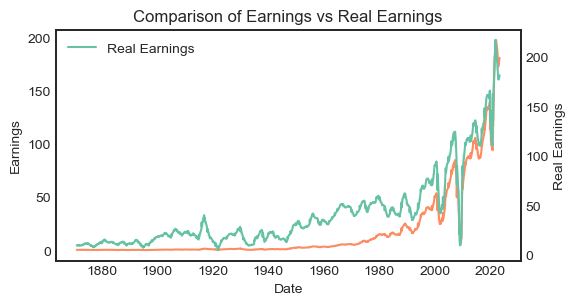

In [32]:
# Time series comparing earnings and real earnings over time
plt.figure(figsize=(6, 3))
sns.lineplot(x=sp500['Date'], y=sp500['Earnings'],color='#FC8D62')
ax = plt.twinx()
sns.lineplot(x=sp500['Date'], y=sp500['Real Earnings'], ax=ax, color='#66C2A5', label='Real Earnings' )
plt.title('Comparison of Earnings vs Real Earnings')
plt.legend()
ax.legend()
plt.show()

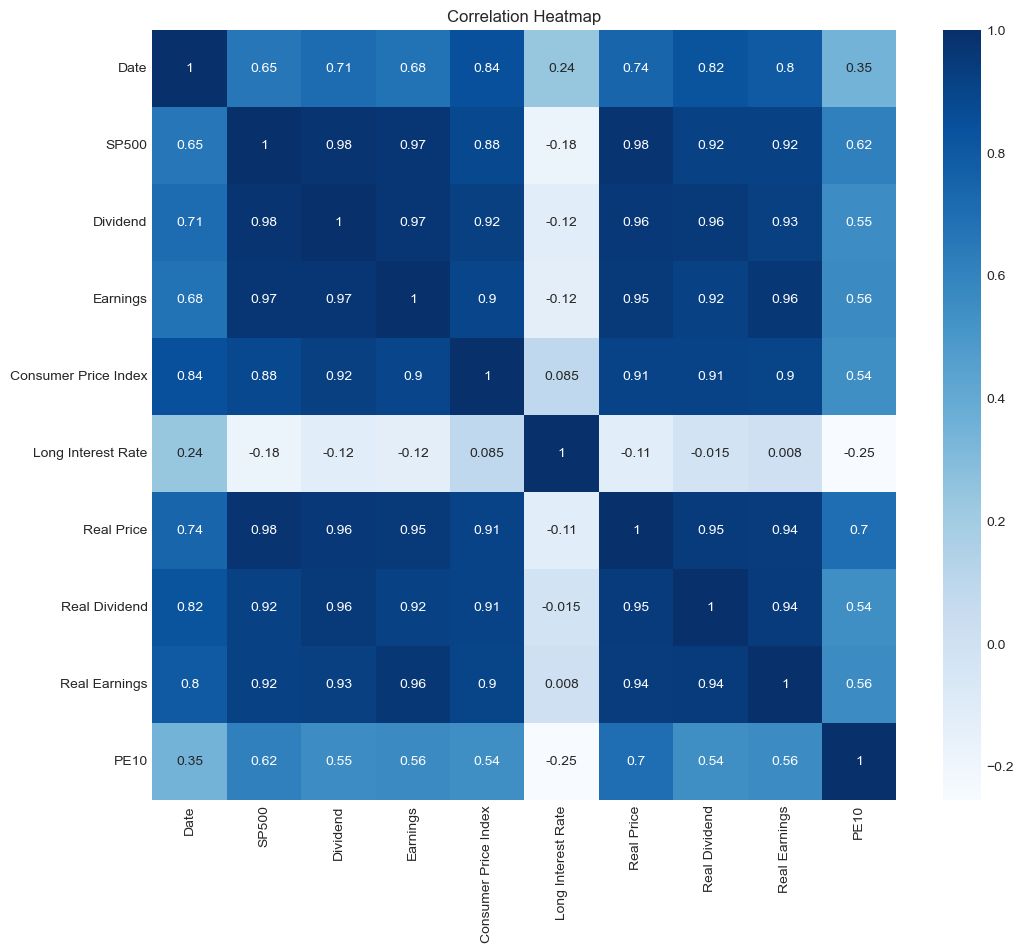

In [33]:
# Heatmap of correlation
plt.figure(figsize=(12,10))
sns.heatmap(sp500.corr(),annot=True,cmap='Blues')
plt.title('Correlation Heatmap')
plt.savefig('corr.png')
plt.show()

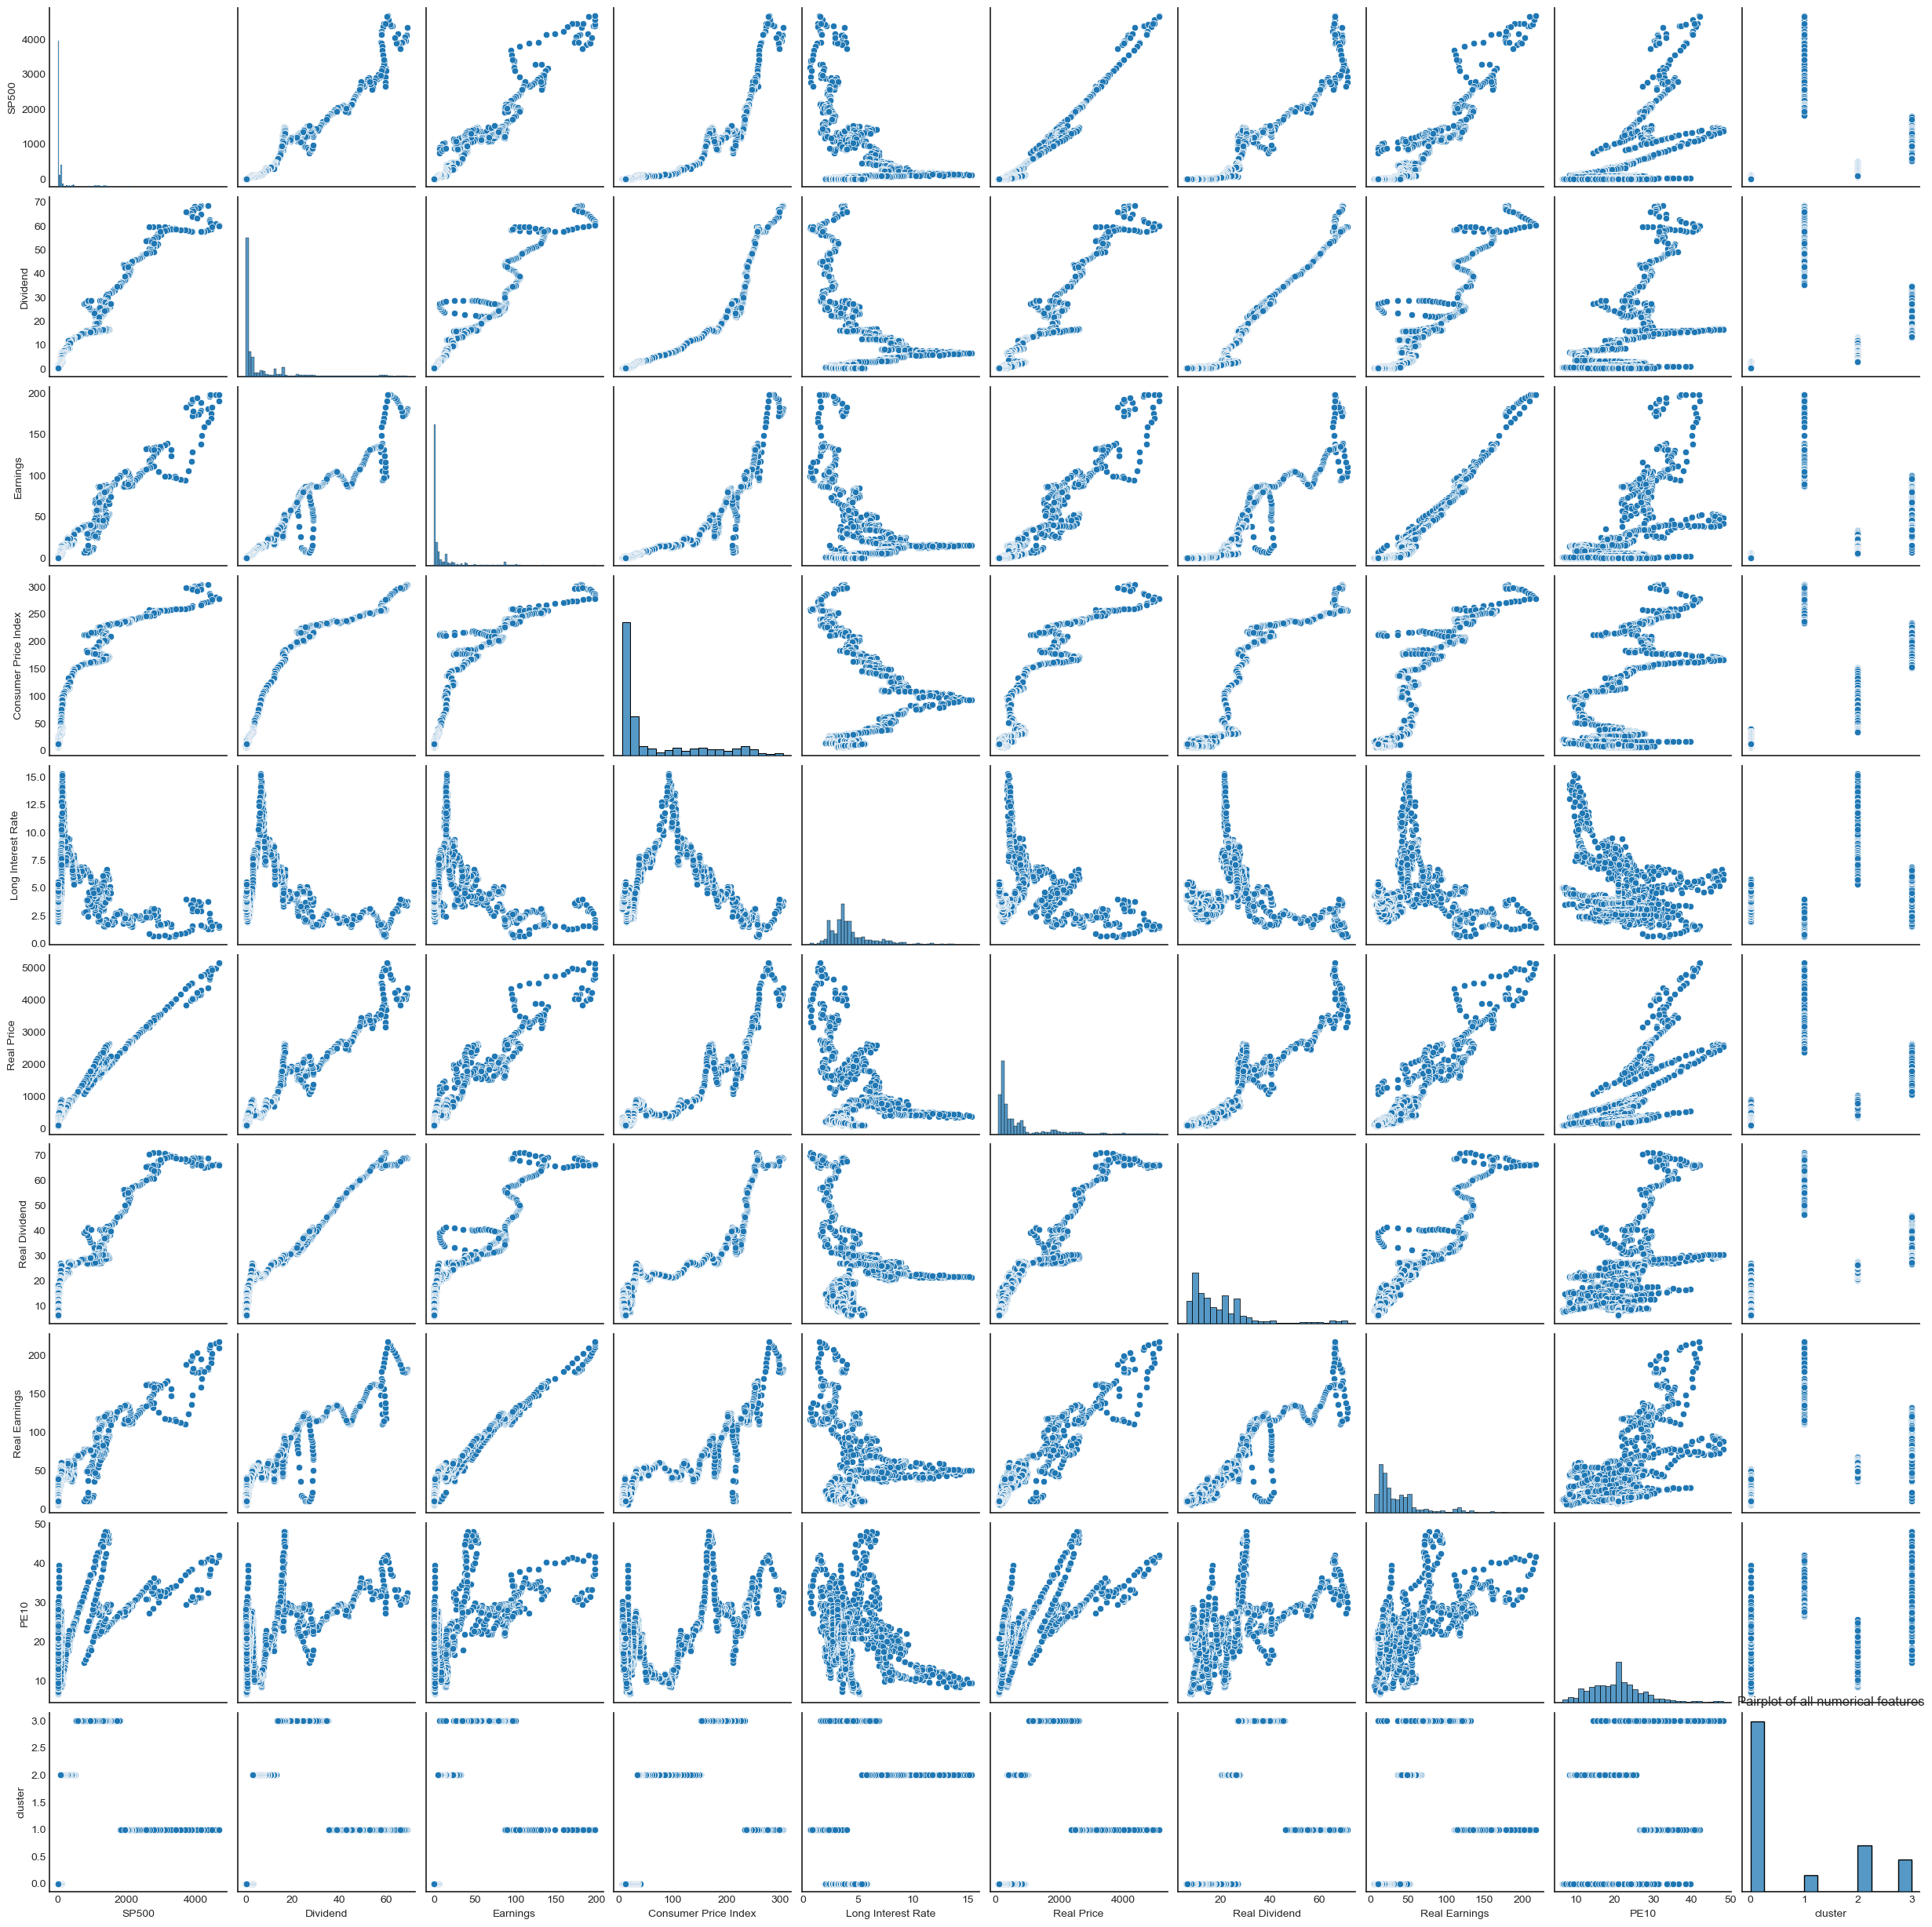

In [188]:
# Pairplot of all numerical features
sns.pairplot(sp500)
plt.title('Pairplot of all numerical features')
plt.show()

## PreProcessing

#### Standardizng

In [37]:
# creating a data frame that will be used for modelling
X = sp500[numerical_cols]

In [38]:
#Instantiating the scaler
scaler = StandardScaler()

In [39]:
# Scaling numerical features
X[numerical_cols]=scaler.fit_transform(X[numerical_cols])

In [40]:
# viewing scaled data
X.head()

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
3,5.023354,4.488083,4.731830,3.017825,-0.321074,4.009995,3.604336,3.734961,1.627777
4,4.771628,4.475622,4.673979,3.005511,-0.399376,3.803608,3.608037,3.697239,1.449547
5,4.740407,4.463894,4.616128,2.995836,-0.447227,3.787645,3.608777,3.655532,1.450950
6,4.547179,4.451432,4.558277,2.974601,-0.360225,3.641625,3.625061,3.628436,1.327452
7,4.687607,4.419913,4.534943,2.964172,-0.321074,3.779187,3.606556,3.619669,1.474808


In [41]:
# summary statistics
X.describe().T

,count,mean,std,min,25%,50%,75%,max
SP500,1830.0,3.106198e-17,1.000273,-0.464396,-0.457824,-0.445055,-0.236211,5.439613
Dividend,1830.0,-3.106198e-17,1.000273,-0.535226,-0.517634,-0.480250,0.016363,4.488083
Earnings,1830.0,9.318593e-17,1.000273,-0.503982,-0.492050,-0.464022,-0.077668,5.216044
Consumer Price Index,1830.0,0.000000e+00,1.000273,-0.736990,-0.686730,-0.540724,0.531075,3.017825
Long Interest Rate,1830.0,-6.212396e-17,1.000273,-1.682651,-0.580992,-0.299324,0.266187,4.711974
Real Price,1830.0,0.000000e+00,1.000273,-0.724858,-0.583853,-0.459283,0.081961,4.874278
Real Dividend,1830.0,1.242479e-16,1.000273,-1.046311,-0.713223,-0.295753,0.406877,3.773100
Real Earnings,1830.0,6.212396e-17,1.000273,-0.957486,-0.672310,-0.375313,0.225256,4.677754
PE10,1830.0,-4.348677e-16,1.000273,-1.997175,-0.709917,0.016687,0.496295,3.831098


## K-Means Clustering

In [43]:
#setting random state
random = 123

In [44]:
# finding the optimal number of clusters
WCSS = []
s_score = []
k = 10
for i in range(2,k+1):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=random)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
    s_score.append(silhouette_score(X, kmeans.labels_))

In [45]:
# Creating data frame for optimal k
optimal_k = pd.DataFrame({'K':range(2,k+1),
                         'WCSS': WCSS,
                         'Silhouette_score': s_score})
optimal_k.head()

,K,WCSS,Silhouette_score
0,2,6611.872162,0.655522
1,3,4557.772554,0.514014
2,4,2841.939791,0.541704
3,5,2435.688322,0.531311
4,6,2040.585252,0.355295


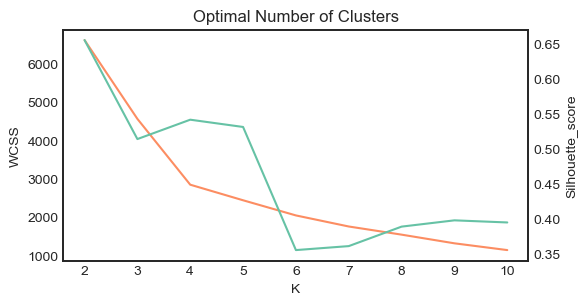

In [46]:
# Visualizing optimal_k
plt.figure(figsize=(6, 3))
sns.lineplot(data=optimal_k, x='K', y='WCSS', color='#FC8D62')
sns.lineplot(data=optimal_k, x='K', y='Silhouette_score', ax=plt.twinx(), color='#66C2A5')
plt.title('Optimal Number of Clusters')
plt.show()

In [47]:
# Clustering based on optimal k
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=random)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=123)

In [48]:
# Silhouette score
silhouette_score(X,kmeans.labels_)

0.5417040177666343

In [49]:
# Assigning cluster to the data frame
sp500['cluster'] = kmeans.labels_
sp500.head()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10,cluster
3,2023-06-01,4345.372857,68.71,181.170000,305.11,3.75,4359.88,68.94,181.77,32.41,1
4,2023-05-01,4146.173182,68.54,179.170000,304.13,3.57,4173.45,68.99,180.35,31.14,1
5,2023-04-01,4121.467368,68.38,177.170000,303.36,3.46,4159.03,69.00,178.78,31.15,1
6,2023-03-01,3968.559130,68.21,175.170000,301.67,3.66,4027.13,69.22,177.76,30.27,1
7,2023-02-01,4079.684737,67.78,174.363333,300.84,3.75,4151.39,68.97,177.43,31.32,1


## PCA

In [51]:
# Applying PCA to reduce the dataset to 2 dimensions for visualization
pca = PCA(n_components=2, random_state=random)
pca_result = pca.fit_transform(X)

In [52]:
# Adding the PCA components to the SP500 dataset
pca_df = sp500[['cluster']]
pca_df[['PCA1','PCA2']] = pca_result

In [53]:
# Explained Variance ratio
pca.explained_variance_ratio_.sum()

0.9059712034356796

In [54]:
pca_df.head()

,cluster,PCA1,PCA2
3,1,10.902265,0.205116
4,1,10.648147,0.213780
5,1,10.588917,0.165507
6,1,10.391493,0.298236
7,1,10.496165,0.261914


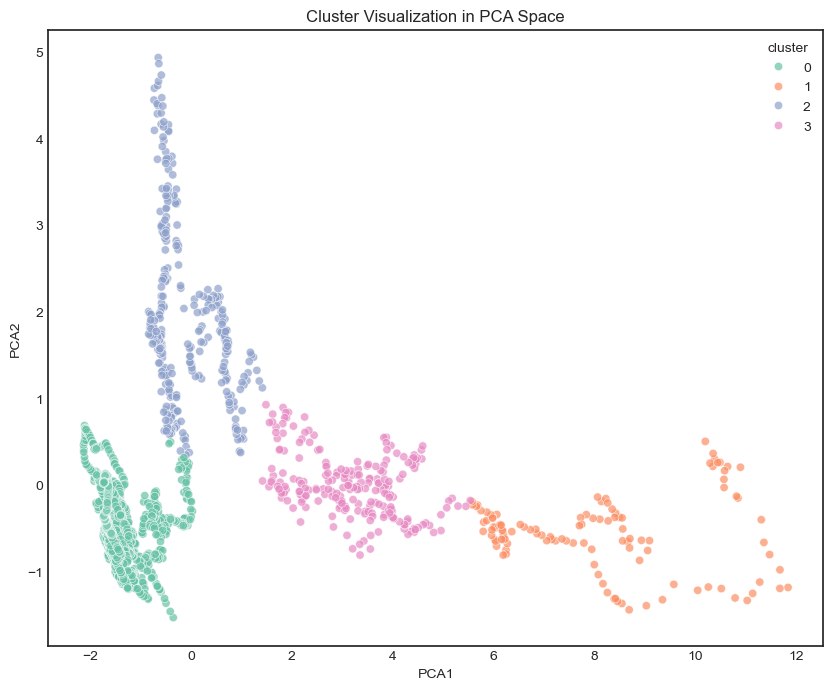

In [117]:
# Visualize the clusters in the 2D PCA space
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df, x='PCA1', y='PCA2',
    hue='cluster', palette='Set2', alpha=0.7
)
plt.title('Cluster Visualization in PCA Space')
plt.savefig('pca.png')
plt.show()

## Hierarchical Clustering

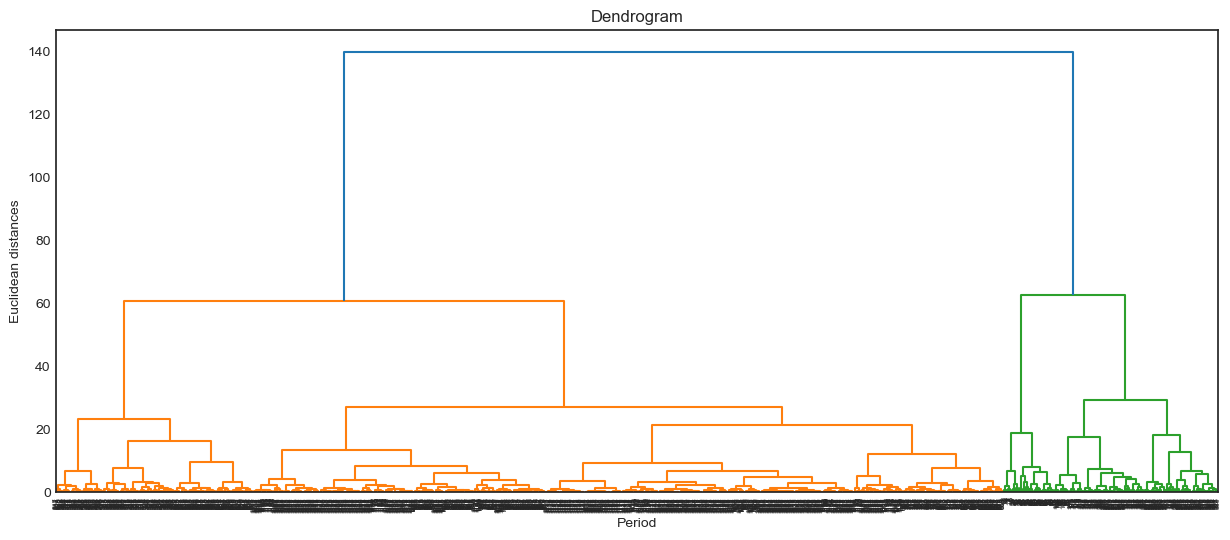

In [57]:
# creating dendrogram to find optimal number of cluster
plt.figure(figsize=(15,6))
dendrogram(linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Period')
plt.ylabel('Euclidean distances')
plt.savefig('dendrogram.png')

In [58]:
# Fitting the Hierarchical cluster
hc = AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage='ward')
hc.fit(X)

AgglomerativeClustering(n_clusters=4)

In [59]:
# Silhouette score
silhouette_score(X,hc.labels_)

0.5357933976598958

## Results

In [127]:
# cluster distribution
sp500['cluster'].value_counts(normalize = True)

cluster
0    0.642077
2    0.173224
3    0.122404
1    0.062295
Name: proportion, dtype: float64

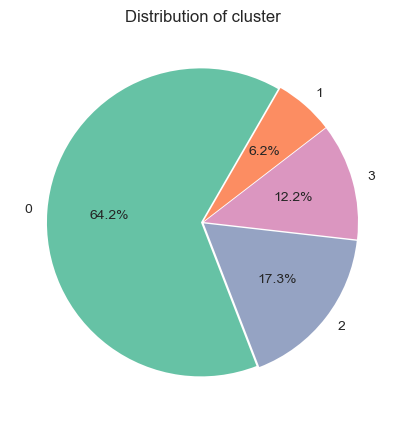

In [140]:
# Pie chart to visualize cluster percentages.
plt.figure(figsize=(10, 5))
sp500['cluster'].value_counts(normalize = True).plot.pie(
    autopct='%1.1f%%',
    startangle=60,
    colors=['#66C2A5', '#95a3c3','#db96c0','#FC8D62'], 
    labels=['0','2','3','1'], 
    explode=[0.01, 0.01, 0.01,0.01])
plt.title('Distribution of cluster')
plt.ylabel('')
plt.show()

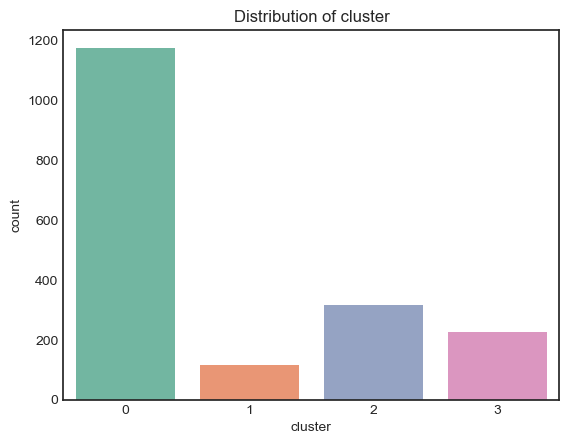

In [134]:
# Bar chart showing cluster distribution
sns.countplot(sp500, x='cluster', palette = 'Set2')
plt.title('Distribution of cluster')
plt.show()

In [62]:
# cluster centroids
Kmeans_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
Kmeans_centroids

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,-0.445398,-0.493665,-0.472250,-0.621699,-0.379780,-0.498298,-0.537724,-0.539292,-0.233394
1,3.233690,3.268575,3.108803,2.410372,-0.992399,2.995180,3.067765,2.817408,1.611208
2,-0.216308,-0.034828,-0.102440,0.306276,1.784861,-0.094950,0.245617,0.188530,-0.588275
3,0.996750,0.975355,1.040019,1.601002,-0.028686,1.223880,0.911786,1.128214,1.236802


In [63]:
# Visualizing cluster summary
cluster_summary = sp500.drop('Date',axis=1).groupby('cluster').mean()

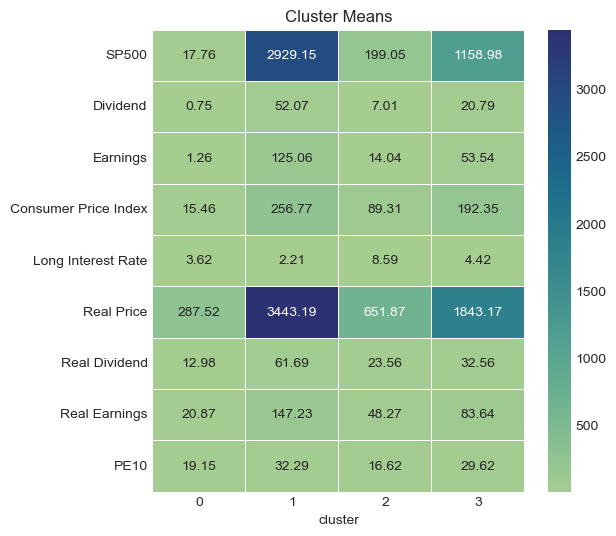

In [173]:
# Heatmap of cluster summary
plt.figure(figsize=(6, 6))
sns.heatmap(cluster_summary.T, cmap='crest', annot=True, fmt='.2f',linewidth=.5)
plt.title('Cluster Means')
plt.show()

In [65]:
cluster_summary.reset_index()

,cluster,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,0,17.763311,0.746987,1.257025,15.455540,3.615047,287.522145,12.980987,20.872255,19.148017
1,1,2929.150593,52.072982,125.059474,256.765351,2.206754,3443.193509,61.690965,147.230088,32.291930
2,2,199.049905,7.006625,14.041924,89.309148,8.591136,651.867697,23.563880,48.270000,16.619274
3,3,1158.984241,20.787946,53.538497,192.350982,4.422143,1843.172277,32.563795,83.642991,29.624063


<Axes: xlabel='Date', ylabel='Earnings'>

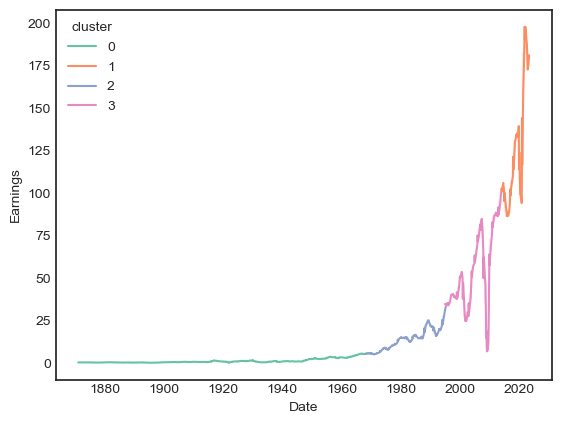

In [179]:
sns.lineplot(x=sp500['Date'], y=sp500['Earnings'],hue=sp500['cluster'],palette='Set2')